In [2]:
import pandas as pd            
from textblob import TextBlob 
from itertools import islice

In [3]:
df_tweet_data = pd.read_csv("impeachment_tweets.csv")
df_tweet_data.head()

,id,created_at,author,likes,followers_count,place,search_term,text
0,1.223033e+18,2020-01-30 23:59:41,1.195376e+18,0,2,NaN,#Impeachment,Adam Schiff addressing the Senate. #impeachmen...
1,1.223033e+18,2020-01-30 23:59:34,8.261545e+17,0,135,NaN,#Impeachment,#Impeachment\nProfessor cited by Dershowitz: D...
2,1.223033e+18,2020-01-30 23:59:23,1.158096e+07,2,19368,NaN,#Impeachment,#Trump supporters seem to think that Hillary C...
3,1.223033e+18,2020-01-30 23:59:18,1.911874e+09,0,348,NaN,#Impeachment,@drwear @paulsperry_ @realDonaldTrump It's evi...
4,1.223033e+18,2020-01-30 23:59:00,9.960836e+17,0,49,NaN,#Impeachment,@SenMikeLee im hoping the #impeachment for the...


In [4]:
COLS = ['date','text', 'sentiment','subjectivity','polarity']
df = pd.DataFrame(columns=COLS)

In [5]:
for index, row in islice(df_tweet_data.iterrows(), 0, None):
    new_entry = []
    text_lower=(row['text']).lower()
    blob = TextBlob(text_lower)
    sentiment = blob.sentiment
    polarity = sentiment.polarity
    subjectivity = sentiment.subjectivity
    new_entry += [row['created_at'],text_lower,sentiment,subjectivity,polarity]    
    single_survey_sentimet_df = pd.DataFrame([new_entry], columns=COLS)
    df = df.append(single_survey_sentimet_df, ignore_index=True)
df.to_csv('Text_Sentiment_Values.csv', mode='w', columns=COLS, index=False, encoding="utf-8")


In [6]:
df.describe()

,subjectivity,polarity
count,50803.000000,50803.000000
mean,0.389025,0.039507
std,0.317251,0.292316
min,0.000000,-1.000000
25%,0.000000,-0.040000
50%,0.400000,0.000000
75%,0.612500,0.175000
max,1.000000,1.000000


In [7]:
dffilter = df.loc[(df.loc[:, df.dtypes != object] != 0).any(1)]
dffilter.describe()

,subjectivity,polarity
count,37229.000000,37229.000000
mean,0.530867,0.053912
std,0.249088,0.340335
min,0.000000,-1.000000
25%,0.357143,-0.125000
50%,0.500000,0.050000
75%,0.700000,0.250000
max,1.000000,1.000000


In [8]:
import nltk
nltk.download()
stopwords = nltk.corpus.stopwords.words('english')
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
words = (df.text
           .str.lower()
           .replace([r'\|',r'\&',r'\-',r'\.',r'\,',r'\'', RE_stopwords], [' ', '','','','','',''], regex=True)
           .str.cat(sep=' ')
           .split()
)


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [9]:
from collections import Counter

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(50),
                    columns=['Word', 'Frequency']).set_index('Word')
rslt


,Frequency
Word,
#impeachment,34222
#democrats,12268
’,8604
#republicans,7349
amp;,6992
trump,6559
@realdonaldtrump,6044
#trump,4728
trial,3750


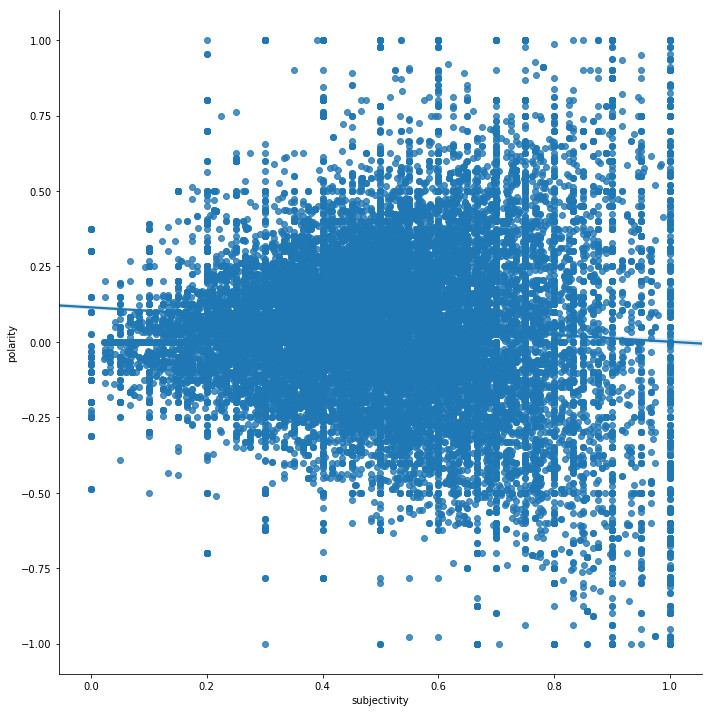

In [12]:
import seaborn as sns
sns.lmplot(x='subjectivity',y='polarity',data=dffilter,fit_reg=True,scatter=True, height=10,palette="mute") 


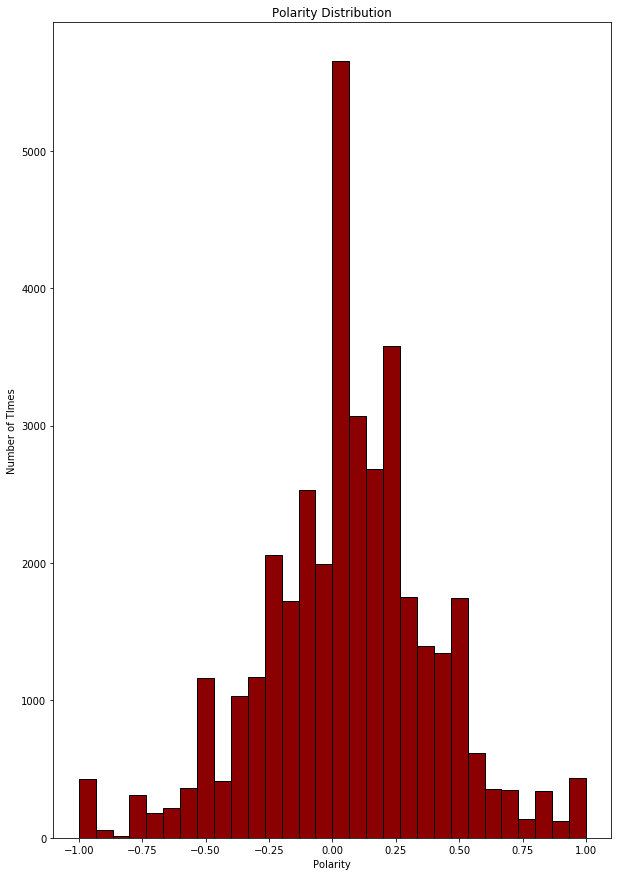

In [13]:
import matplotlib.pyplot as plt
plt.hist(dffilter['polarity'], color = 'darkred', edgecolor = 'black', density=False,
         bins = int(30))
plt.title('Polarity Distribution')
plt.xlabel("Polarity")
plt.ylabel("Number of TImes")

from pylab import rcParams
rcParams['figure.figsize'] = 10,15